# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key + "&q="
city_names = []
lat = []
lng = []
temp = []
humid = []
clouds = []
wind = []
number = 1

for city in cities:
    try:
        response = (requests.get(query_url + city + "&units=imperial")).json()
        city_names.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        print(f'City number {number} of {len(cities)} complete. | Added {city}')
        number = number + 1
    
    except KeyError:
        print(f'Missing data in city number {number} of {len(cities)}. | Skipping {city}')
        number = number + 1

City number 1 of 614 complete. | Added lorengau
City number 2 of 614 complete. | Added jumla
City number 3 of 614 complete. | Added pisco
City number 4 of 614 complete. | Added pevek
City number 5 of 614 complete. | Added san patricio
City number 6 of 614 complete. | Added puerto ayora
Missing data in city number 7 of 614. | Skipping amderma
City number 8 of 614 complete. | Added punta arenas
City number 9 of 614 complete. | Added mataura
City number 10 of 614 complete. | Added yellowknife
City number 11 of 614 complete. | Added bethel
Missing data in city number 12 of 614. | Skipping ambodifototra
City number 13 of 614 complete. | Added rikitea
City number 14 of 614 complete. | Added busselton
City number 15 of 614 complete. | Added arraial do cabo
City number 16 of 614 complete. | Added nanortalik
City number 17 of 614 complete. | Added bredasdorp
City number 18 of 614 complete. | Added chokurdakh
City number 19 of 614 complete. | Added bluff
City number 20 of 614 complete. | Added n

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# city_names, lat, lng, temp, humid, clouds, wind

#Create DataFrame
weather_df = pd.DataFrame(
{"Latitude" : lat,
"Longitude" : lng,
"Temperature" : temp,
"Humidity" : humid,
"Clouds" : clouds,
"Wind" : wind},
index = city_names)

#Save to CSV
weather_df.to_csv("../output_data/weather_data.csv", index=True)

In [10]:
weather_df.head()

,Latitude,Longitude,Temperature,Humidity,Clouds,Wind
Lorengau,-2.02,147.27,83.05,77,100,11.90
Jumla,29.27,82.18,32.45,43,0,5.79
Pisco,-13.70,-76.22,72.82,30,100,13.87
Pevek,69.70,170.31,-12.86,100,100,8.25
San Patricio,19.22,-104.70,86.00,74,5,11.41


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [11]:
min = weather_df.min()
min

Latitude       -54.80
Longitude     -175.20
Temperature    -41.80
Humidity         8.00
Clouds           0.00
Wind             0.34
dtype: float64

In [12]:
max = weather_df.max()
max

Latitude        78.22
Longitude      179.32
Temperature     96.64
Humidity       100.00
Clouds         100.00
Wind            49.44
dtype: float64

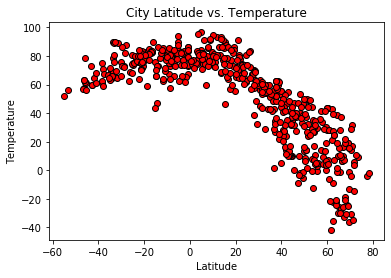

In [15]:
temps = weather_df["Temperature"]

x_axis = weather_df["Latitude"]

plt.scatter(x_axis, temps, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig('../output_data/NG_temp.png')

#### Latitude vs. Humidity Plot

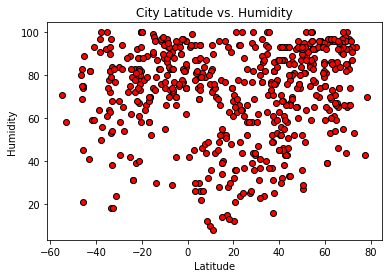

In [16]:
temps = weather_df["Humidity"]

x_axis = weather_df["Latitude"]

plt.scatter(x_axis, temps, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig('../output_data/NG_humid.png')

#### Latitude vs. Cloudiness Plot

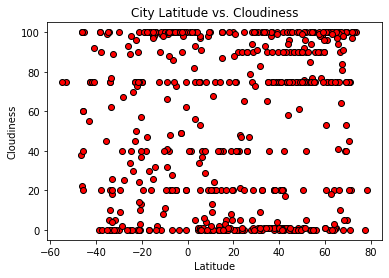

In [17]:
temps = weather_df["Clouds"]

x_axis = weather_df["Latitude"]

plt.scatter(x_axis, temps, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig('../output_data/NG_cloud.png')

#### Latitude vs. Wind Speed Plot

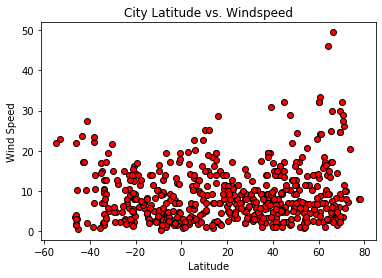

In [18]:
temps = weather_df["Wind"]

x_axis = weather_df["Latitude"]

plt.scatter(x_axis, temps, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs. Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig('../output_data/NG_wind.png')

## Linear Regression

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots
def line_reg(a, b):
    x_values = a
    y_values = b
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return regression

def line_eq(a, b):
    x_values = a
    y_values = b
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return equation

def r_value(a, b):
    x_values = a
    y_values = b
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    return rvalue

In [17]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = pd.DataFrame()
southern_df = pd.DataFrame()
x = 0

for city in cities:
    try:
        if (weather_df["Latitude"][x]) > 0:
            northern_df = northern_df.append(weather_df[x:x+1])
            x = x + 1
        else:
            southern_df = southern_df.append(weather_df[x:x+1])
            x = x + 1
    except:
        ()

In [18]:
len(northern_df)

384

In [19]:
len(southern_df)

181

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8429321063481434


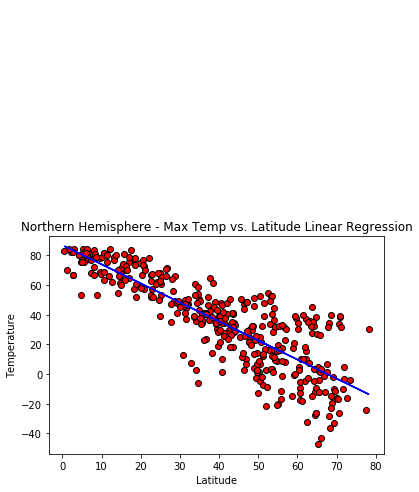

In [20]:
x_values = northern_df["Latitude"]
y_values = northern_df["Temperature"]

plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black")
plt.plot(x_values, line_reg(x_values, y_values),"b-")
plt.annotate(line_eq(x_values, y_values),(10,240),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
print(f"The r-squared is: {r_value(x_values, y_values)}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4398826838968386


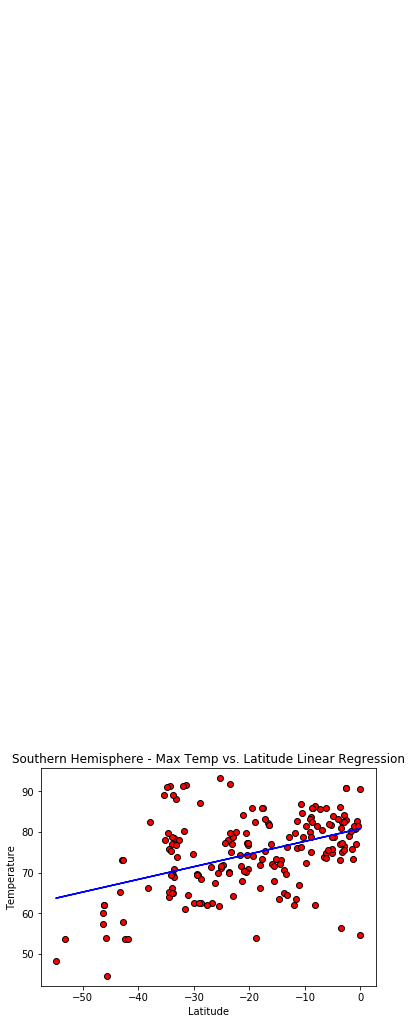

In [21]:
x_values = southern_df["Latitude"]
y_values = southern_df["Temperature"]

plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black")
plt.plot(x_values, line_reg(x_values, y_values),"b-")
plt.annotate(line_eq(x_values, y_values),(-30,280),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
print(f"The r-squared is: {r_value(x_values, y_values)}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.39647020903572616


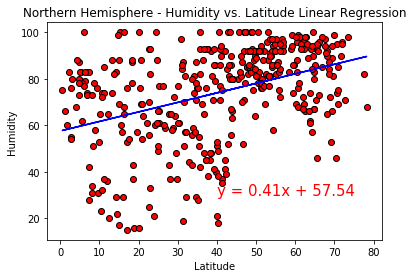

In [22]:
x_values = northern_df["Latitude"]
y_values = northern_df["Humidity"]

plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black")
plt.plot(x_values, line_reg(x_values, y_values),"b-")
plt.annotate(line_eq(x_values, y_values),(40,30),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {r_value(x_values, y_values)}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.39510201773969766


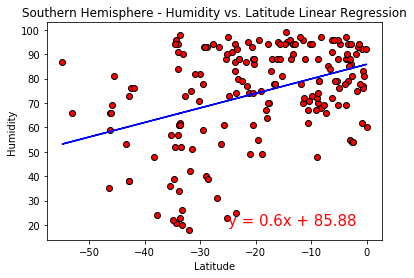

In [23]:
x_values = southern_df["Latitude"]
y_values = southern_df["Humidity"]

plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black")
plt.plot(x_values, line_reg(x_values, y_values),"b-")
plt.annotate(line_eq(x_values, y_values),(-25,20),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {r_value(x_values, y_values)}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.219496936709709


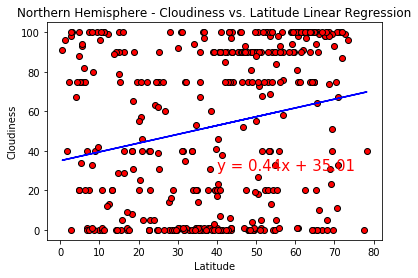

In [24]:
x_values = northern_df["Latitude"]
y_values = northern_df["Clouds"]

plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black")
plt.plot(x_values, line_reg(x_values, y_values),"b-")
plt.annotate(line_eq(x_values, y_values),(40,30),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {r_value(x_values, y_values)}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.23124777197188937


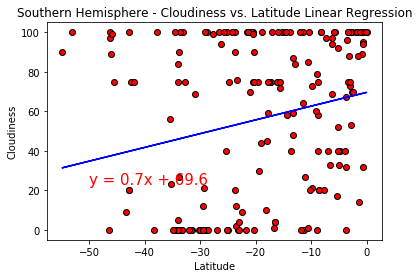

In [25]:
x_values = southern_df["Latitude"]
y_values = southern_df["Clouds"]

plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black")
plt.plot(x_values, line_reg(x_values, y_values),"b-")
plt.annotate(line_eq(x_values, y_values),(-50,23),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {r_value(x_values, y_values)}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.11164770717706955


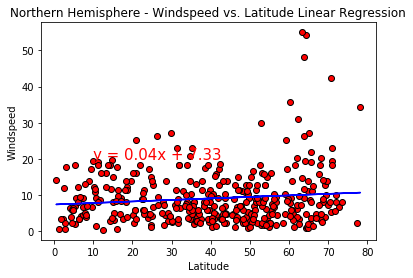

In [26]:
x_values = northern_df["Latitude"]
y_values = northern_df["Wind"]

plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black")
plt.plot(x_values, line_reg(x_values, y_values),"b-")
plt.annotate(line_eq(x_values, y_values),(10,20),fontsize=15,color="red")
plt.title("Northern Hemisphere - Windspeed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
print(f"The r-squared is: {r_value(x_values, y_values)}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2954893081540241


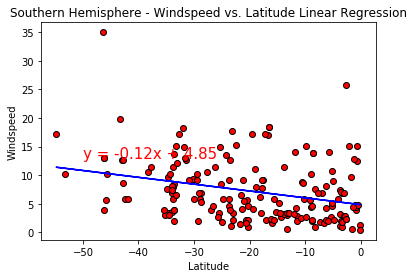

In [27]:
x_values = southern_df["Latitude"]
y_values = southern_df["Wind"]

plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black")
plt.plot(x_values, line_reg(x_values, y_values),"b-")
plt.annotate(line_eq(x_values, y_values),(-50,13),fontsize=15,color="red")
plt.title("Southern Hemisphere - Windspeed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
print(f"The r-squared is: {r_value(x_values, y_values)}")
plt.show()

In [20]:
pd.DataFrame.to_html(weather_df)

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Latitude</th>\n      <th>Longitude</th>\n      <th>Temperature</th>\n      <th>Humidity</th>\n      <th>Clouds</th>\n      <th>Wind</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>Lorengau</th>\n      <td>-2.02</td>\n      <td>147.27</td>\n      <td>83.05</td>\n      <td>77</td>\n      <td>100</td>\n      <td>11.90</td>\n    </tr>\n    <tr>\n      <th>Jumla</th>\n      <td>29.27</td>\n      <td>82.18</td>\n      <td>32.45</td>\n      <td>43</td>\n      <td>0</td>\n      <td>5.79</td>\n    </tr>\n    <tr>\n      <th>Pisco</th>\n      <td>-13.70</td>\n      <td>-76.22</td>\n      <td>72.82</td>\n      <td>30</td>\n      <td>100</td>\n      <td>13.87</td>\n    </tr>\n    <tr>\n      <th>Pevek</th>\n      <td>69.70</td>\n      <td>170.31</td>\n      <td>-12.86</td>\n      <td>100</td>\n      <td>100</td>\n      <td>8.25</td>\n    </tr>\n    <tr>\n      <th>San Patri